<a href="https://colab.research.google.com/github/MINJIN82/-Ubion/blob/main/mini_project25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###diet 파일

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 23 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 1s (7,106 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 128285 files and di

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('font',family='NanumbarunGothic')

In [ ]:
from matplotlib import pyplot as plt
from pandas import DataFrame
import numpy as np
import pandas as pd
import math
import sklearn.preprocessing 
from scipy import stats
import scipy as sp
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [ ]:
df = pd.read_excel("/content/drive/MyDrive/mini/online_diet_1.xlsx")

/usr/local/lib/python3.9/dist-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


In [ ]:
df.head()

,seq_num,id,social_id1,zip_code,occupation,sex,height,weight,married,dise,...,bmi,order_id,pfid,p_name,p_price,p_created,p_quantity,1P_price,Unnamed: 27,Unnamed: 28
0,28.0,webinner,740101.0,137-070,6.0,1.0,170.0,62.0,0.0,NaN,...,21.0,16560.0,MDGLIKE001,"오레그 O다리,X다리 교정벨트(고급형)",27000.0,2001-05-17 오후 1:10:38,1.0,27000.0,NaN,NaN
1,29.0,webinner,740101.0,137-070,6.0,1.0,170.0,62.0,0.0,NaN,...,21.0,16926.0,MDGLIKE001,"오레그 O다리,X다리 교정벨트(고급형)",27000.0,2001-05-17 오후 1:26:33,1.0,27000.0,NaN,NaN
2,30.0,webinner,740101.0,137-070,6.0,1.0,170.0,62.0,0.0,NaN,...,21.0,16941.0,MDGLIKE001,"오레그 O다리,X다리 교정벨트(고급형)",27000.0,2001-05-17 오후 2:19:23,1.0,27000.0,NaN,NaN
3,31.0,webinner,740101.0,137-070,6.0,1.0,170.0,62.0,0.0,NaN,...,21.0,16944.0,MDGLIKE001,"오레그 O다리,X다리 교정벨트(고급형)",27000.0,2001-05-17 오후 2:27:24,1.0,27000.0,NaN,NaN
4,32.0,webinner,740101.0,137-070,6.0,1.0,170.0,62.0,0.0,NaN,...,21.0,16967.0,MDGBEAT004,아로마 장미향,20000.0,2001-05-17 오후 4:25:11,1.0,20000.0,NaN,NaN


In [ ]:
df.isnull().sum()
df_z =df.fillna(0)
df_z.isnull().sum()

seq_num            0
id                 0
social_id1         0
zip_code           0
occupation         0
sex                0
height             0
weight             0
married            0
dise               0
want_diet          0
goal               0
created            0
waist              0
heap               0
loss_part          0
loss_part_count    0
diet_purpose       0
diet               0
bmi                0
order_id           0
pfid               0
p_name             0
p_price            0
p_created          0
p_quantity         0
1P_price           0
Unnamed: 27        0
Unnamed: 28        0
dtype: int64

In [ ]:
df=df_z
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4511 entries, 0 to 4510
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   seq_num          4511 non-null   float64
 1   id               4511 non-null   object 
 2   social_id1       4511 non-null   float64
 3   zip_code         4511 non-null   object 
 4   occupation       4511 non-null   float64
 5   sex              4511 non-null   float64
 6   height           4511 non-null   float64
 7   weight           4511 non-null   float64
 8   married          4511 non-null   float64
 9   dise             4511 non-null   object 
 10  want_diet        4511 non-null   float64
 11  goal             4511 non-null   float64
 12  created          4511 non-null   object 
 13  waist            4511 non-null   object 
 14  heap             4511 non-null   object 
 15  loss_part        4511 non-null   object 
 16  loss_part_count  4511 non-null   float64
 17  diet_purpose  

In [ ]:
df

,seq_num,id,social_id1,zip_code,occupation,sex,height,weight,married,dise,...,bmi,order_id,pfid,p_name,p_price,p_created,p_quantity,1P_price,Unnamed: 27,Unnamed: 28
0,28.0,webinner,740101.0,137-070,6.0,1.0,170.0,62.0,0.0,0,...,21.0,16560.0,MDGLIKE001,"오레그 O다리,X다리 교정벨트(고급형)",27000.0,2001-05-17 오후 1:10:38,1.0,27000.0,0.0,0
1,29.0,webinner,740101.0,137-070,6.0,1.0,170.0,62.0,0.0,0,...,21.0,16926.0,MDGLIKE001,"오레그 O다리,X다리 교정벨트(고급형)",27000.0,2001-05-17 오후 1:26:33,1.0,27000.0,0.0,0
2,30.0,webinner,740101.0,137-070,6.0,1.0,170.0,62.0,0.0,0,...,21.0,16941.0,MDGLIKE001,"오레그 O다리,X다리 교정벨트(고급형)",27000.0,2001-05-17 오후 2:19:23,1.0,27000.0,0.0,0
3,31.0,webinner,740101.0,137-070,6.0,1.0,170.0,62.0,0.0,0,...,21.0,16944.0,MDGLIKE001,"오레그 O다리,X다리 교정벨트(고급형)",27000.0,2001-05-17 오후 2:27:24,1.0,27000.0,0.0,0
4,32.0,webinner,740101.0,137-070,6.0,1.0,170.0,62.0,0.0,0,...,21.0,16967.0,MDGBEAT004,아로마 장미향,20000.0,2001-05-17 오후 4:25:11,1.0,20000.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4506,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0,0,0.0,0,0.0,0.0,0.0,0
4507,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0,0,0.0,0,0.0,0.0,0.0,0
4508,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0,0,0.0,0,0.0,0.0,0.0,0
4509,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0,0,0.0,0,0.0,0.0,0.0,0


<Axes: >

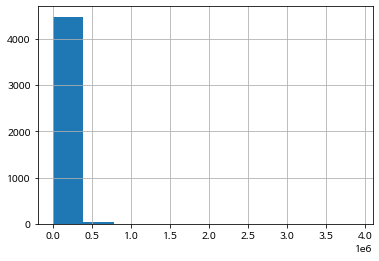

In [ ]:
df['p_price'].hist()

BP(ax=<Axes: >, lines={'whiskers': [<matplotlib.lines.Line2D object at 0x7fcf72455c70>, <matplotlib.lines.Line2D object at 0x7fcf72455f10>], 'caps': [<matplotlib.lines.Line2D object at 0x7fcf7264e1f0>, <matplotlib.lines.Line2D object at 0x7fcf7264e490>], 'boxes': [<matplotlib.lines.Line2D object at 0x7fcf72aa8cd0>], 'medians': [<matplotlib.lines.Line2D object at 0x7fcf7264e730>], 'fliers': [<matplotlib.lines.Line2D object at 0x7fcf7264ea00>], 'means': []})

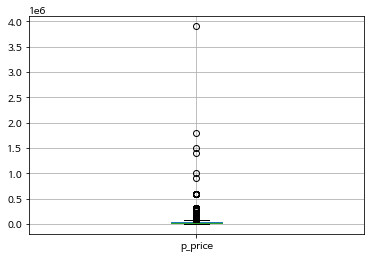

In [ ]:
from ast import Return
df.boxplot(column='p_price', return_type='both')


In [ ]:
q1 = df["p_price"].quantile(q=0.25) #1분위수
q3 = df["p_price"].quantile(q=0.75) #3분위수
IQR =q3-q1
IQR

24000.0

In [ ]:
data_IQR =df[(df["p_price"] < q3 + IQR*1.5) & (df["p_price"]>q1-IQR *1.5)]
data_IQR

,seq_num,id,social_id1,zip_code,occupation,sex,height,weight,married,dise,...,bmi,order_id,pfid,p_name,p_price,p_created,p_quantity,1P_price,Unnamed: 27,Unnamed: 28
0,28.0,webinner,740101.0,137-070,6.0,1.0,170.0,62.0,0.0,0,...,21.0,16560.0,MDGLIKE001,"오레그 O다리,X다리 교정벨트(고급형)",27000.0,2001-05-17 오후 1:10:38,1.0,27000.0,0.0,0
1,29.0,webinner,740101.0,137-070,6.0,1.0,170.0,62.0,0.0,0,...,21.0,16926.0,MDGLIKE001,"오레그 O다리,X다리 교정벨트(고급형)",27000.0,2001-05-17 오후 1:26:33,1.0,27000.0,0.0,0
2,30.0,webinner,740101.0,137-070,6.0,1.0,170.0,62.0,0.0,0,...,21.0,16941.0,MDGLIKE001,"오레그 O다리,X다리 교정벨트(고급형)",27000.0,2001-05-17 오후 2:19:23,1.0,27000.0,0.0,0
3,31.0,webinner,740101.0,137-070,6.0,1.0,170.0,62.0,0.0,0,...,21.0,16944.0,MDGLIKE001,"오레그 O다리,X다리 교정벨트(고급형)",27000.0,2001-05-17 오후 2:27:24,1.0,27000.0,0.0,0
4,32.0,webinner,740101.0,137-070,6.0,1.0,170.0,62.0,0.0,0,...,21.0,16967.0,MDGBEAT004,아로마 장미향,20000.0,2001-05-17 오후 4:25:11,1.0,20000.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4506,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0,0,0.0,0,0.0,0.0,0.0,0
4507,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0,0,0.0,0,0.0,0.0,0.0,0
4508,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0,0,0.0,0,0.0,0.0,0.0,0
4509,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0,0,0.0,0,0.0,0.0,0.0,0


In [ ]:
df=data_IQR

In [ ]:
id_v=df["p_price"].value_counts()
id_v

12900.0    612
19500.0    549
29900.0    286
18000.0    240
22000.0    201
          ... 
38700.0      1
39600.0      1
34000.0      1
59400.0      1
59700.0      1
Name: p_price, Length: 79, dtype: int64

In [ ]:
df['bmi_g']=df['bmi'].apply(lambda x: 
                                1 if x < 18.5 
                                else 2 if x < 23 
                                else 3 if x < 25 
                                else 4 if x < 30 
                                else 5)
df

<ipython-input-149-b4a2bda96788>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bmi_g']=df['bmi'].apply(lambda x:


,seq_num,id,social_id1,zip_code,occupation,sex,height,weight,married,dise,...,order_id,pfid,p_name,p_price,p_created,p_quantity,1P_price,Unnamed: 27,Unnamed: 28,bmi_g
0,28.0,webinner,740101.0,137-070,6.0,1.0,170.0,62.0,0.0,0,...,16560.0,MDGLIKE001,"오레그 O다리,X다리 교정벨트(고급형)",27000.0,2001-05-17 오후 1:10:38,1.0,27000.0,0.0,0,2
1,29.0,webinner,740101.0,137-070,6.0,1.0,170.0,62.0,0.0,0,...,16926.0,MDGLIKE001,"오레그 O다리,X다리 교정벨트(고급형)",27000.0,2001-05-17 오후 1:26:33,1.0,27000.0,0.0,0,2
2,30.0,webinner,740101.0,137-070,6.0,1.0,170.0,62.0,0.0,0,...,16941.0,MDGLIKE001,"오레그 O다리,X다리 교정벨트(고급형)",27000.0,2001-05-17 오후 2:19:23,1.0,27000.0,0.0,0,2
3,31.0,webinner,740101.0,137-070,6.0,1.0,170.0,62.0,0.0,0,...,16944.0,MDGLIKE001,"오레그 O다리,X다리 교정벨트(고급형)",27000.0,2001-05-17 오후 2:27:24,1.0,27000.0,0.0,0,2
4,32.0,webinner,740101.0,137-070,6.0,1.0,170.0,62.0,0.0,0,...,16967.0,MDGBEAT004,아로마 장미향,20000.0,2001-05-17 오후 4:25:11,1.0,20000.0,0.0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4506,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0,0,0.0,0,0.0,0.0,0.0,0,1
4507,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0,0,0.0,0,0.0,0.0,0.0,0,1
4508,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0,0,0.0,0,0.0,0.0,0.0,0,1
4509,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0,0,0.0,0,0.0,0.0,0.0,0,1


###'저체중': 1,
'정상': 2,
'과체중': 3,
'비만': 4,
'고도비만': 5

In [ ]:
df['bmi_g'].value_counts()

2    2286
3     653
1     519
4     475
5      92
Name: bmi_g, dtype: int64

In [ ]:
e   = df.sort_values(["weight"],ascending=False)
e

,seq_num,id,social_id1,zip_code,occupation,sex,height,weight,married,dise,...,order_id,pfid,p_name,p_price,p_created,p_quantity,1P_price,Unnamed: 27,Unnamed: 28,bmi_g
2059,2662.0,nowpap,750314.0,305-343,12.0,2.0,159.0,505.5,0.0,4,...,22907.0,MDGLIKE006,매직마스크(★10만고객돌파기념☆),12900.0,2001-07-24 오전 10:05:01,1.0,12900.0,0.0,0,2
652,4092.0,ytm1004,731002.0,403-014,3.0,1.0,180.0,180.0,0.0,"1, 2",...,28980.0,MDEPART009,GDS-미니스텝퍼,39900.0,2001-08-22 오전 1:01:45,1.0,39900.0,0.0,0,5
4054,1571.0,yeppi0242,781104.0,602-062,3.0,2.0,155.0,167.0,0.0,"1, 2",...,24191.0,MDEETCC030,파워세라믹 종아리다이어트(1년 감사세일),19500.0,2001-08-03 오전 10:49:39,1.0,19500.0,0.0,0,5
713,3696.0,nysms,710102.0,480-090,14.0,2.0,159.0,164.0,1.0,0,...,23206.0,MDGFASH004,다이어트 반바지,20000.0,2001-08-18 오전 10:42:58,1.0,20000.0,0.0,0,5
677,4118.0,kimmh9632,660914.0,340-806,1.0,2.0,163.0,162.0,1.0,1,...,29091.0,MDGLIKE006,매직마스크(★10만고객돌파기념☆),14900.0,2001-08-22 오후 2:02:01,1.0,14900.0,0.0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4476,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0,0,0.0,0,0.0,0.0,0.0,0,1
4478,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0,0,0.0,0,0.0,0.0,0.0,0,1
4479,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0,0,0.0,0,0.0,0.0,0.0,0,1
4480,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0,0,0.0,0,0.0,0.0,0.0,0,1


In [ ]:
g = e[e["weight"]>= 150].index
g

Int64Index([2059, 652, 4054, 713, 677, 1811, 978], dtype='int64')

In [ ]:
df.drop(g,inplace=True)

KeyError: ignored

In [ ]:
g = e[e["weight"]== 0].index
g

Int64Index([4492, 4489, 4494, 4491, 4490, 4493, 1175, 4488, 4487, 4496, 4486,
            4485, 4495, 4502, 4497, 4498, 4499, 4500, 4501, 4483, 4503, 4504,
            4505, 4506, 4507, 4508, 4509, 4484, 4477, 4482, 4467,  878, 2625,
            4458, 4459, 4460, 4461, 4462, 4463, 4464, 4465, 4466, 4468, 4481,
            4469, 4470, 4471, 4472, 4473, 4474, 4475, 4476, 4478, 4479, 4480,
            4510],
           dtype='int64')

In [ ]:
df.drop(g,inplace=True)

<ipython-input-158-3256cb97788e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(g,inplace=True)


In [ ]:
df

,seq_num,id,social_id1,zip_code,occupation,sex,height,weight,married,dise,...,order_id,pfid,p_name,p_price,p_created,p_quantity,1P_price,Unnamed: 27,Unnamed: 28,bmi_g
0,28.0,webinner,740101.0,137-070,6.0,1.0,170.0,62.0,0.0,0,...,16560.0,MDGLIKE001,"오레그 O다리,X다리 교정벨트(고급형)",27000.0,2001-05-17 오후 1:10:38,1.0,27000.0,0.0,0,2
1,29.0,webinner,740101.0,137-070,6.0,1.0,170.0,62.0,0.0,0,...,16926.0,MDGLIKE001,"오레그 O다리,X다리 교정벨트(고급형)",27000.0,2001-05-17 오후 1:26:33,1.0,27000.0,0.0,0,2
2,30.0,webinner,740101.0,137-070,6.0,1.0,170.0,62.0,0.0,0,...,16941.0,MDGLIKE001,"오레그 O다리,X다리 교정벨트(고급형)",27000.0,2001-05-17 오후 2:19:23,1.0,27000.0,0.0,0,2
3,31.0,webinner,740101.0,137-070,6.0,1.0,170.0,62.0,0.0,0,...,16944.0,MDGLIKE001,"오레그 O다리,X다리 교정벨트(고급형)",27000.0,2001-05-17 오후 2:27:24,1.0,27000.0,0.0,0,2
4,32.0,webinner,740101.0,137-070,6.0,1.0,170.0,62.0,0.0,0,...,16967.0,MDGBEAT004,아로마 장미향,20000.0,2001-05-17 오후 4:25:11,1.0,20000.0,0.0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4450,2008.0,witch4820,800206.0,139-201,17.0,2.0,160.0,45.0,0.0,1,...,21639.0,MDEHRWE008,파워세라믹종아리 다이어트,29900.0,2001-07-05 오후 3:00:42,1.0,29900.0,0.0,0,1
4452,2010.0,aram622,760622.0,122-945,12.0,2.0,165.0,60.0,0.0,2,...,21647.0,PDFFUNC001,내추럴하우스 라인-업,60000.0,2001-07-05 오후 4:58:43,1.0,60000.0,0.0,0,2
4453,2011.0,0162655575,830219.0,135-080,15.0,2.0,165.0,49.0,0.0,0,...,21654.0,MDEHRWE008,파워세라믹종아리 다이어트,29900.0,2001-07-05 오후 7:17:10,1.0,29900.0,0.0,0,1
4455,2013.0,onlyonelhm,880330.0,327-030,15.0,2.0,159.0,58.0,0.0,0,...,21664.0,MDEHRWE008,파워세라믹종아리 다이어트,29900.0,2001-07-06 오전 1:17:45,1.0,29900.0,0.0,0,2


In [ ]:
df.columns

Index(['seq_num', 'id', 'social_id1', 'zip_code', 'occupation', 'sex',
       'height', 'weight', 'married', 'dise', 'want_diet', 'goal', 'created',
       'waist', 'heap', 'loss_part', 'loss_part_count', 'diet_purpose', 'diet',
       'bmi', 'order_id', 'pfid', 'p_name', 'p_price', 'p_created',
       'p_quantity', '1P_price', 'Unnamed: 27', 'Unnamed: 28', 'bmi_g'],
      dtype='object')

In [ ]:
df['bmi_g'].value_counts()

2    2285
3     653
4     475
1     463
5      86
Name: bmi_g, dtype: int64

In [ ]:
df['diet_purpose'].value_counts()

1.0    2099
3.0     856
5.0     354
2.0     270
0.0     239
4.0     144
Name: diet_purpose, dtype: int64

In [ ]:
df.groupby(by=['bmi_g'],as_index=False)["diet_purpose"].mean()


,bmi_g,diet_purpose
0,1,1.693305
1,2,1.840700
2,3,2.004594
3,4,2.212632
4,5,2.360465


In [ ]:
df.groupby(by=['bmi_g'],as_index=False)["p_price"].mean()

,bmi_g,p_price
0,1,24045.788337
1,2,24682.778993
2,3,26550.076570
3,4,27040.000000
4,5,26184.883721


In [ ]:
df.groupby(by=['diet_purpose'],as_index=False)["p_price"].mean()

,diet_purpose,p_price
0,0.0,24368.200837
1,1.0,24567.579800
2,2.0,26414.444444
3,3.0,26332.651869
4,4.0,27502.430556
5,5.0,25260.169492


In [ ]:
df.groupby(by=['loss_part_count'],as_index=False)["p_price"].mean()

,loss_part_count,p_price
0,1.0,24637.661406
1,2.0,24739.912281
2,3.0,24987.921022
3,4.0,26073.387097
4,5.0,25859.170854
5,6.0,24300.000000
6,7.0,27134.899329
7,8.0,26535.185185
8,9.0,25045.859873


In [ ]:
df['social_id1'] = df['social_id1'].astype(str) # 시리즈의 데이터 타입을 문자열로 변환
df['birth_year'] = df['social_id1'].str[:2]

<ipython-input-167-a52044d3ae35>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['social_id1'] = df['social_id1'].astype(str) # 시리즈의 데이터 타입을 문자열로 변환
<ipython-input-167-a52044d3ae35>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['birth_year'] = df['social_id1'].str[:2]


In [ ]:
df['birth_year'] = '19' + df['social_id1'].str.extract('(\d{2})') # 2자리 숫자 추출
this_year = 2023
df['age_group'] = (this_year - df['birth_year'].fillna(0).astype(int)) // 10 * 10 # 결측치를 0으로 대체한 후 정수형으로 변환 후 계산

<ipython-input-168-de904f832f6a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['birth_year'] = '19' + df['social_id1'].str.extract('(\d{2})') # 2자리 숫자 추출
<ipython-input-168-de904f832f6a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age_group'] = (this_year - df['birth_year'].fillna(0).astype(int)) // 10 * 10 # 결측치를 0으로 대체한 후 정수형으로 변환 후 계산


In [ ]:
df

,seq_num,id,social_id1,zip_code,occupation,sex,height,weight,married,dise,...,p_name,p_price,p_created,p_quantity,1P_price,Unnamed: 27,Unnamed: 28,bmi_g,birth_year,age_group
0,28.0,webinner,740101.0,137-070,6.0,1.0,170.0,62.0,0.0,0,...,"오레그 O다리,X다리 교정벨트(고급형)",27000.0,2001-05-17 오후 1:10:38,1.0,27000.0,0.0,0,2,1974,40
1,29.0,webinner,740101.0,137-070,6.0,1.0,170.0,62.0,0.0,0,...,"오레그 O다리,X다리 교정벨트(고급형)",27000.0,2001-05-17 오후 1:26:33,1.0,27000.0,0.0,0,2,1974,40
2,30.0,webinner,740101.0,137-070,6.0,1.0,170.0,62.0,0.0,0,...,"오레그 O다리,X다리 교정벨트(고급형)",27000.0,2001-05-17 오후 2:19:23,1.0,27000.0,0.0,0,2,1974,40
3,31.0,webinner,740101.0,137-070,6.0,1.0,170.0,62.0,0.0,0,...,"오레그 O다리,X다리 교정벨트(고급형)",27000.0,2001-05-17 오후 2:27:24,1.0,27000.0,0.0,0,2,1974,40
4,32.0,webinner,740101.0,137-070,6.0,1.0,170.0,62.0,0.0,0,...,아로마 장미향,20000.0,2001-05-17 오후 4:25:11,1.0,20000.0,0.0,0,2,1974,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4450,2008.0,witch4820,800206.0,139-201,17.0,2.0,160.0,45.0,0.0,1,...,파워세라믹종아리 다이어트,29900.0,2001-07-05 오후 3:00:42,1.0,29900.0,0.0,0,1,1980,40
4452,2010.0,aram622,760622.0,122-945,12.0,2.0,165.0,60.0,0.0,2,...,내추럴하우스 라인-업,60000.0,2001-07-05 오후 4:58:43,1.0,60000.0,0.0,0,2,1976,40
4453,2011.0,0162655575,830219.0,135-080,15.0,2.0,165.0,49.0,0.0,0,...,파워세라믹종아리 다이어트,29900.0,2001-07-05 오후 7:17:10,1.0,29900.0,0.0,0,1,1983,40
4455,2013.0,onlyonelhm,880330.0,327-030,15.0,2.0,159.0,58.0,0.0,0,...,파워세라믹종아리 다이어트,29900.0,2001-07-06 오전 1:17:45,1.0,29900.0,0.0,0,2,1988,30


In [ ]:
df.groupby(by=['age_group'],as_index=False)["p_price"].mean()

,age_group,p_price
0,30,19013.220339
1,40,24991.742951
2,50,28206.052632
3,60,27026.973684
4,70,22234.782609
5,2020,49000.000000


In [ ]:
g = df[df["age_group"]>= 2020].index
g

Int64Index([2567], dtype='int64')

In [ ]:
df.drop(g,inplace=True)

<ipython-input-172-3256cb97788e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(g,inplace=True)


In [ ]:
df['age_group'].value_counts()

40    2731
50     760
30     295
60     152
70      23
Name: age_group, dtype: int64

In [ ]:
df.groupby(by=['age_group'],as_index=False)["p_price"].mean()

,age_group,p_price
0,30,19013.220339
1,40,24991.742951
2,50,28206.052632
3,60,27026.973684
4,70,22234.782609


In [ ]:
df.columns

Index(['seq_num', 'id', 'social_id1', 'zip_code', 'occupation', 'sex',
       'height', 'weight', 'married', 'dise', 'want_diet', 'goal', 'created',
       'waist', 'heap', 'loss_part', 'loss_part_count', 'diet_purpose', 'diet',
       'bmi', 'order_id', 'pfid', 'p_name', 'p_price', 'p_created',
       'p_quantity', '1P_price', 'Unnamed: 27', 'Unnamed: 28', 'bmi_g',
       'birth_year', 'age_group'],
      dtype='object')

In [ ]:
df.groupby(by=['age_group'],as_index=False)["pfid"].nunique() #nunique()고유한 열값

,age_group,pfid
0,30,36
1,40,111
2,50,90
3,60,33
4,70,15


In [ ]:
df2 = df.loc[df['age_group'] == 40, ['pfid']].reset_index(drop=True)

In [ ]:
df2

,pfid
0,MDGLIKE001
1,MDGLIKE001
2,MDGLIKE001
3,MDGLIKE001
4,MDGBEAT004
...,...
2726,MDEHRWE008
2727,MDEHRWE008
2728,PDFFUNC001
2729,MDEHRWE008


In [ ]:
df2['pfid'].value_counts()

MDGLIKE006    409
MDEHRWE008    333
MDEPART007    178
MDGFASH004    166
MDEPART001    155
             ... 
MDFFUNC003      1
MDEPART014      1
MDGLIKE011      1
MDEHRWE010      1
MDEETCC015      1
Name: pfid, Length: 111, dtype: int64

In [ ]:
counts_df = df2['pfid'].value_counts().to_frame()
counts_df 

,pfid
MDGLIKE006,409
MDEHRWE008,333
MDEPART007,178
MDGFASH004,166
MDEPART001,155
...,...
MDFFUNC003,1
MDEPART014,1
MDGLIKE011,1
MDEHRWE010,1


In [ ]:
counts_df.to_excel('C:/Users/Username/Desktop/counts.xlsx', index=True)

In [ ]:
df3 =  df.loc[df['age_group'] == 40, ['loss_part']].reset_index(drop=True)
df3

,loss_part
0,"1, 2"
1,"1, 2"
2,"1, 2"
3,"1, 2"
4,"1, 2"
...,...
2726,4
2727,4
2728,1
2729,"3, 6"


In [ ]:
df3['loss_part'].value_counts()

6                            176
0                            136
1, 2, 3, 4, 5, 6, 7, 8, 9    112
2, 6                          84
1, 6                          84
                            ... 
4, 5, 7                        1
1, 2, 3, 4, 5, 6, 8            1
2, 5, 6, 9                     1
6, 8, 9                        1
1, 5                           1
Name: loss_part, Length: 249, dtype: int64

In [ ]:
loss_part_df = df3['loss_part'].value_counts().to_frame()
loss_part_df 

,loss_part
6,176
0,136
"1, 2, 3, 4, 5, 6, 7, 8, 9",112
"2, 6",84
"1, 6",84
...,...
"4, 5, 7",1
"1, 2, 3, 4, 5, 6, 8",1
"2, 5, 6, 9",1
"6, 8, 9",1


In [ ]:
loss_part_df.to_excel('loss_part.xlsx', index=True)

In [ ]:
df4 =  df.loc[df['age_group'] == 40, ['goal']].reset_index(drop=True)
df4

,goal
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
2726,3.0
2727,3.0
2728,10.0
2729,2.0


In [ ]:
df4['goal'].value_counts() # 40 대 50% 이상이 4 킬로 이상 빼고 싶어 함함

 4.0     579
 5.0     263
 6.0     252
 3.0     232
 2.0     172
        ... 
 31.0      1
 4.8       1
 45.0      1
-0.5       1
-6.0       1
Name: goal, Length: 84, dtype: int64

In [ ]:
df_price = df.loc[df['age_group'] == 40, ['p_price']].reset_index(drop=True)

In [ ]:
df_price['p_price'].value_counts()

12900.0    419
19500.0    401
29900.0    200
18000.0    174
22000.0    149
          ... 
38000.0      1
2000.0       1
66000.0      1
58500.0      1
35900.0      1
Name: p_price, Length: 74, dtype: int64

In [ ]:
df.groupby(by=['age_group'],as_index=False)["p_price"].mean()

,age_group,p_price
0,30,19013.220339
1,40,24991.742951
2,50,28206.052632
3,60,27026.973684
4,70,22234.782609


In [ ]:
df

<ipython-input-193-1928b63f12c3>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["p_price"] = np.log1p(df["p_price"])
<ipython-input-193-1928b63f12c3>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["p_price"])


<Axes: xlabel='p_price', ylabel='Density'>

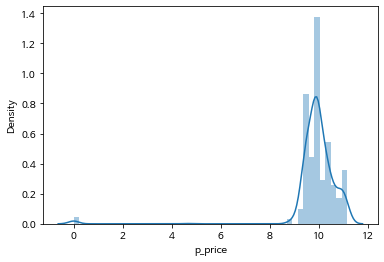

In [ ]:
import matplotlib
import seaborn as sns
import pandas as pd
from scipy import stats

df["p_price"] = np.log1p(df["p_price"])
sns.distplot(df["p_price"])

In [ ]:
from sklearn import preprocessing
df["p_price"]=preprocessing.scale(df["p_price"])
df["p_price"].describe()


<ipython-input-194-176736fa2329>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["p_price"]=preprocessing.scale(df["p_price"])


count    3.961000e+03
mean    -5.453294e-16
std      1.000126e+00
min     -8.990635e+00
25%     -2.728280e-01
50%     -1.657304e-02
75%      3.525261e-01
max      1.123701e+00
Name: p_price, dtype: float64

In [ ]:
from sklearn.preprocessing import MinMaxScaler
minMaxScaler = MinMaxScaler()
print(minMaxScaler.fit(df[["p_price"]]))
train_data_minMaxScaled = minMaxScaler.transform(df[["p_price"]])
df["p_price_minmax"]=train_data_minMaxScaled
df["p_price_minmax"].describe()

MinMaxScaler()


<ipython-input-195-399a075eef2e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["p_price_minmax"]=train_data_minMaxScaled


count    3961.000000
mean        0.888900
std         0.098882
min         0.000000
25%         0.861926
50%         0.887262
75%         0.923754
max         1.000000
Name: p_price_minmax, dtype: float64

In [ ]:
df["p_price_minmax"]

0       0.914610
1       0.914610
2       0.914610
3       0.914610
4       0.887711
          ...   
4450    0.923754
4452    0.986183
4453    0.923754
4455    0.923754
4456    1.000000
Name: p_price_minmax, Length: 3961, dtype: float64

In [ ]:
df1 = df[["goal", "loss_part_count", "bmi", "diet", "p_price_minmax"]]
print(df.corr(method='spearman'))

                  seq_num  occupation       sex    height    weight   married  \
seq_num          1.000000    0.013131 -0.062203  0.005445 -0.016829  0.005662   
occupation       0.013131    1.000000  0.054294  0.005061 -0.071177 -0.201199   
sex             -0.062203    0.054294  1.000000 -0.373882 -0.297866 -0.006870   
height           0.005445    0.005061 -0.373882  1.000000  0.457522 -0.095201   
weight          -0.016829   -0.071177 -0.297866  0.457522  1.000000  0.111082   
married          0.005662   -0.201199 -0.006870 -0.095201  0.111082  1.000000   
want_diet        0.013999   -0.106346 -0.355185  0.499258  0.818842  0.126918   
goal            -0.052248    0.040972  0.105345  0.034498  0.437701  0.022428   
loss_part_count -0.055901    0.014282  0.176872 -0.112919  0.133000 -0.045240   
diet_purpose    -0.007565   -0.108673 -0.073591 -0.005928  0.139673  0.167463   
bmi             -0.035733   -0.081075 -0.134992  0.017737  0.845518  0.179884   
order_id         0.840875   

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from scipy.stats import boxcox

In [ ]:
df.columns

Index(['seq_num', 'id', 'social_id1', 'zip_code', 'occupation', 'sex',
       'height', 'weight', 'married', 'dise', 'want_diet', 'goal', 'created',
       'waist', 'heap', 'loss_part', 'loss_part_count', 'diet_purpose', 'diet',
       'bmi', 'order_id', 'pfid', 'p_name', 'p_price', 'p_created',
       'p_quantity', '1P_price', 'Unnamed: 27', 'Unnamed: 28', 'bmi_g',
       'birth_year', 'age_group', 'p_price_minmax'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3961 entries, 0 to 4456
Data columns (total 33 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   seq_num          3961 non-null   float64
 1   id               3961 non-null   object 
 2   social_id1       3961 non-null   object 
 3   zip_code         3961 non-null   object 
 4   occupation       3961 non-null   float64
 5   sex              3961 non-null   float64
 6   height           3961 non-null   float64
 7   weight           3961 non-null   float64
 8   married          3961 non-null   float64
 9   dise             3961 non-null   object 
 10  want_diet        3961 non-null   float64
 11  goal             3961 non-null   float64
 12  created          3961 non-null   object 
 13  waist            3961 non-null   object 
 14  heap             3961 non-null   object 
 15  loss_part        3961 non-null   object 
 16  loss_part_count  3961 non-null   float64
 17  diet_purpose  

In [ ]:
num = ['goal', 'bmi','loss_part_count','age_group'] #스케일러 적용
 #카테고리컬(범주형) 

X = df[num]
Y = df['p_price']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

#표준화, 원핫인코딩
ct = ColumnTransformer([('scling',StandardScaler(),num)])
ct.fit(X_train)
X_train = ct.transform(X_train)
X_test = ct.transform(X_test)

print(X_train[0])


[ 0.11612851 -0.04305196  1.5694108   1.18806057]


In [ ]:
from sklearn.linear_model import LinearRegression #LinearRegression 선형모델
from sklearn.metrics import mean_squared_error 
from math import sqrt #sqrt 루트

lr = LinearRegression().fit(X_train, Y_train) 

Y_pred = lr.predict(X_test)
print("predict value\n",Y_pred)
print("train R2 : {:.3f}".format(lr.score(X_train, Y_train))) #트레인 데이터로 나온 R스퀘어
print("test R2 : {:.3f}".format(lr.score(X_test, Y_test))) 

rmse = sqrt(mean_squared_error(Y_test, Y_pred)) 
print("RMSE : {:.3f}". format(rmse))

predict value
 [-0.11607239  0.08583506 -0.01539054 ... -0.02909396  0.0109335
  0.00730601]
train R2 : 0.003
test R2 : 0.002
RMSE : 1.058


In [ ]:
#릿지(L2) 모형이 라쏘(L1) 모형보다 예측을 더 잘한다.(오차가 적다)
#다수의 변수, 변수의 계수(베타)를 0에 가깝게 만들어야하는 데이터 셋의 경우 라쏘가 더 낫다. 
#알파가 작아지느냐 알파가 커지느냐에 따라 규제 강도가 달라진다.
#알파가 작으면 선형회귀 모형에 가까워지고, 커질 수록 릿지와 라쏘의 모형에 가까워진다.

from sklearn.linear_model import Ridge

lr_ridge = Ridge(random_state = 0). fit(X_train, Y_train)
Y_pred = lr_ridge.predict(X_test)

print("예측값(Y predict value)\n", Y_pred)

rmse = sqrt(mean_squared_error(Y_test, Y_pred))
print("ridge R2 : {:.3f}". format(lr_ridge.score(X_train, Y_train)))
print("RMSE : {:.3f}".format(rmse))

#비교
print("lr R2 : {:.3f}". format(lr_ridge.score(X_train, Y_train)))

예측값(Y predict value)
 [0.88867913 0.89757605 0.8892863  ... 0.89300894 0.89019617 0.8897736 ]
ridge R2 : 0.009
RMSE : 0.104
lr R2 : 0.009


In [ ]:
#라쏘
from sklearn.linear_model import Lasso

lr_lasso = Lasso(random_state = 0, alpha = 0.01, max_iter =1000). fit(X_train, Y_train) #alpha = 0.01, max_iter =1000) 등 연구자가 정해주는 값이 하이퍼 파라미터이다.
#알파 값에 의해서 규제를 준다.
Y_pred = lr_lasso.predict(X_test)

print("예측값(Y predict value)\n", Y_pred)

rmse = sqrt(mean_squared_error(Y_test, Y_pred))
print("lasso R2 : {:.3f}". format(lr_lasso.score(X_train, Y_train)))
print("RMSE : {:.3f}".format(rmse))

#비교
print("lr R2 : {:.3f}". format(lr.score(X_train, Y_train)))
print("ridge R2 : {:.3f}". format(lr_ridge.score(X_train, Y_train)))

예측값(Y predict value)
 [0.66219677 0.66219677 0.66651963 ... 0.66003534 0.6643582  0.65787391]
lasso R2 : 0.010
RMSE : 0.107
lr R2 : 0.445
ridge R2 : 0.445


In [ ]:
#knn최근접이웃

from sklearn.neighbors import KNeighborsRegressor
knn_reg = KNeighborsRegressor(n_neighbors =9, p=2)
#p : int, default =2
#Power parameter for the Minkowski metric. When p=1,
#This is equivalent to using manhattan_distance(l1),and euclidean_distance(l2) for p = 2. For arbitrary p, minkowski_distance

knn_reg.fit(X_train,Y_train)
Y_pred = knn_reg.predict(X_test)
print("accuracy :{:.3f}".format(knn_reg.score(X_train, Y_train))) #모형의 Train으로 구한 정확도임(R2과 같음음)
rmse = sqrt(mean_squared_error(Y_test, Y_pred))
print("RMSE: {:.3f}".format(rmse))

accuracy :0.510
RMSE: 0.086


In [ ]:
#의사결정나무

from sklearn.tree import DecisionTreeRegressor

DT_model_reg = DecisionTreeRegressor(random_state=0,max_depth =5)
DT_model_reg.fit(X_train, Y_train)
Y_pred = DT_model_reg.predict(X_test)
print("accuracy : {:.3f}".format(DT_model_reg.score(X_train, Y_train)))
rmse = sqrt(mean_squared_error(Y_test,Y_pred))
print("rmse :{:.3f} ",format(rmse))

accuracy : 0.486
rmse :{:.3f}  0.08308040206301717


In [ ]:
feature_name = X.columns
feature_importance = DT_model_reg.feature_importances_
sorted(zip(feature_importance, feature_name),reverse=True)

[(0.9412255890191475, 'loss_part_count'),
 (0.02455771434060504, 'bmi'),
 (0.010403192205711634, 'goal'),
 (0.004427335123510325, 'occupation'),
 (0.0, 'sex'),
 (0.0, 'married')]

In [ ]:
DT_model_reg.feature_importances_

array([0.01040319, 0.02455771, 0.94122559, 0.        , 0.        ,
       0.00442734, 0.00228923, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.01709694, 0.        ,
       0.        ])

In [ ]:
#인공신경망

#4. 모델링
from sklearn.neural_network import MLPRegressor

#4-1. 모델 생성
nn_reg_model = MLPRegressor(random_state = 0,alpha=0.001, max_iter = 2000, hidden_layer_sizes=[50,50])

#5. 모형학습 및 예측
nn_reg_model.fit(X_train, Y_train)
Y_pred = nn_reg_model.predict(X_test)

#6. 결과값 보고
print("Y predict value :\n", Y_pred)
print("train accuracy : {:.3f}".format(nn_reg_model.score(X_train, Y_train)))
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(Y_test, Y_pred))
print("accuracy : {:.3f}".format(nn_reg_model.score(X_train, Y_train)))
print("RMSE : {:.3f}". format(rmse))

Y predict value :
 [0.63962201 0.67314617 0.62087606 ... 0.64731765 0.65926498 0.63131233]
train accuracy : 0.442
accuracy : 0.442
RMSE : 0.086
